In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
%run init.ipynb
%run init-tensor_product.ipynb
%run init-quantum_resources.ipynb
%run init-optical_elements.ipynb

In [3]:
from qiskit.quantum_info import entropy, DensityMatrix

In [4]:
%run init-qiskit.ipynb

C:\Users\stark\AppData\Local\Temp\ipykernel_10072\1918398002.py:6: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
ibmqfactory.load_account:WARNING:2023-06-14 18:42:31,336: Credentials are already in use. The existing account in the session will be replaced.


ibm_perth                    ibm_nairobi                  ibm_lagos
---------                    -----------                  ---------
Num. Qubits:  7              Num. Qubits:  7              Num. Qubits:  7
Pending Jobs: 215            Pending Jobs: 92             Pending Jobs: 213
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      174.8          Avg. T1:      101.6          Avg. T1:      124.3
Avg. T2:      121.9          Avg. T2:      57.9           Avg. T2:      62.4



ibmq_manila                  ibmq_jakarta                 ibmq_quito
-----------                  ------------                 ----------
Num. Qubits:  5              Num. Qubits:  7              Num. Qubits:  5
Pending Jobs: 66             Pending Jobs: 123            Pending Jobs: 28
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operati

In [5]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.2', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': None, 'qiskit': '0.36.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [6]:
%run init-qiskit_optical_elements.ipynb

In [7]:
device = provider.get_backend('ibm_nairobi')

# Irrealidade do caminho $b$ dentro do IMZ

## BBO$_{p}$ - Dentro do IMZ - QWP$_{out}$

In [8]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
rhob_AbWZ_out            = np.zeros(th.shape[0], dtype=object)
rhob_0bWZ_out            = np.zeros(th.shape[0], dtype=object)
Phi_b_0bWZ_out           = np.zeros(th.shape[0], dtype=object)
Irr_b_out                = np.zeros(th.shape[0], dtype=object)
jobs_ids_b_out = []

<img src = 'setup_realism.jpg' width = '90%'>

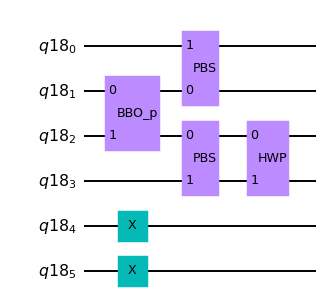

In [9]:
def qc_QCRb_out(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])              # BBO_p
    #qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                           # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                      # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                      # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                      # HWP
    qc.x(4); qc.x(5) # Atoms's innitial state
    #qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    #qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                            # Phase
    #qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRb_out_ = qc_QCRb_out(math.pi); qc_QCRb_out_.draw(output = 'mpl', scale = 0.7)

In [11]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=9
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_out.append(x)

ibm_nairobi

2023-05-29 - 13:53:38

--------------------------------------

j =  9  - theta = 1.419216694115407
--------------------------------------

k =  0
Job Status: job has successfully run
2023-05-30 - 04:15:19
chqdh5guhh1ldcq61fm0
k =  0

k =  1
Job Status: job has successfully run
2023-05-30 - 04:28:19
chqq5342b9sdqn3q2tfg
k =  1

k =  2
Job Status: job has successfully run
2023-05-30 - 04:35:17
chqqb5qnajhpa65vgu0g
k =  2

k =  3
Job Status: job has successfully run
2023-05-30 - 04:42:14
chqqeedaqbbvbu0vi910
k =  3

k =  4
Job Status: job has successfully run
2023-05-30 - 04:49:15
chqqhmqnajhpa65vmgqg
k =  4

k =  5
Job Status: job has successfully run
2023-05-30 - 04:56:32
chqql042b9sdqn3qg4sg
k =  5

k =  6
Job Status: job has successfully run
2023-05-30 - 05:03:43
chqqod5aqbbvbu0vr1m0
k =  6

k =  7
Job Status: job has successfully run
2023-05-30 - 05:14:14
chqqrov8rmtc64s78c9g
k =  7

k =  8
Job Status: job has successfully run
2023-05-30 - 05:20:18
chqr0manajhpa6602sjg
k

In [12]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/10
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 55886.53 segundos
Tempo de execução: 931.44 minutos
Tempo de execução: 15.52 horas
Tempo de execução por job: 1.55 horas 


In [13]:
jobs_ids_b_out

[['chqdh5guhh1ldcq61fm0',
  'chqq5342b9sdqn3q2tfg',
  'chqqb5qnajhpa65vgu0g',
  'chqqeedaqbbvbu0vi910',
  'chqqhmqnajhpa65vmgqg',
  'chqql042b9sdqn3qg4sg',
  'chqqod5aqbbvbu0vr1m0',
  'chqqrov8rmtc64s78c9g',
  'chqr0manajhpa6602sjg',
  'chqr3hdaqbbvbu103j5g']]

In [14]:
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

In [27]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=8
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_out.append(x)

ibm_nairobi

2023-05-30 - 07:15:10

--------------------------------------

j =  8  - theta = 1.2626370614359173
--------------------------------------

k =  0
Job Status: job has successfully run
2023-05-30 - 07:57:57
chqspccpd6rr9jk7b880
k =  0

k =  1
Job Status: job has successfully run
2023-05-30 - 09:34:26
chqtdeqnajhpa6624fm0
k =  1

k =  2
Job Status: job has successfully run
2023-05-30 - 09:46:14
chquqlqnajhpa663g4q0
k =  2

k =  3
Job Status: job has successfully run
2023-05-30 - 10:06:56
chqv06n8rmtc64sb1e7g
k =  3

k =  4
Job Status: job has successfully run
2023-05-30 - 10:25:04
chqv9tc2b9sdqn3uj9k0
k =  4

k =  5
Job Status: job has successfully run
2023-05-30 - 10:44:43
chqvid42b9sdqn3ur740
k =  5

k =  6
Job Status: job has successfully run
2023-05-30 - 10:48:45
chqvrjqnajhpa664g2lg
k =  6

k =  7
Job Status: job has successfully run
2023-05-30 - 11:08:29
chqvtgspd6rr9jkabd50
k =  7

k =  8
Job Status: job has successfully run
2023-05-30 - 11:26:59
chr06okpd6rr9jkal1bg


In [28]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/10
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 18725.0 segundos
Tempo de execução: 312.08 minutos
Tempo de execução: 5.2 horas
Tempo de execução por job: 0.52 horas 


In [29]:
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

In [30]:
x

['chqspccpd6rr9jk7b880',
 'chqtdeqnajhpa6624fm0',
 'chquqlqnajhpa663g4q0',
 'chqv06n8rmtc64sb1e7g',
 'chqv9tc2b9sdqn3uj9k0',
 'chqvid42b9sdqn3ur740',
 'chqvrjqnajhpa664g2lg',
 'chqvtgspd6rr9jkabd50',
 'chr06okpd6rr9jkal1bg',
 'chr0fdqnajhpa6654ce0']

In [32]:
jobs_ids_b_out

[['chqdh5guhh1ldcq61fm0',
  'chqq5342b9sdqn3q2tfg',
  'chqqb5qnajhpa65vgu0g',
  'chqqeedaqbbvbu0vi910',
  'chqqhmqnajhpa65vmgqg',
  'chqql042b9sdqn3qg4sg',
  'chqqod5aqbbvbu0vr1m0',
  'chqqrov8rmtc64s78c9g',
  'chqr0manajhpa6602sjg',
  'chqr3hdaqbbvbu103j5g'],
 ['chqspccpd6rr9jk7b880',
  'chqtdeqnajhpa6624fm0',
  'chquqlqnajhpa663g4q0',
  'chqv06n8rmtc64sb1e7g',
  'chqv9tc2b9sdqn3uj9k0',
  'chqvid42b9sdqn3ur740',
  'chqvrjqnajhpa664g2lg',
  'chqvtgspd6rr9jkabd50',
  'chr06okpd6rr9jkal1bg',
  'chr0fdqnajhpa6654ce0']]

In [19]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=7
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_out.append(x)

ibm_nairobi

2023-05-30 - 06:56:26

--------------------------------------

j =  7  - theta = 1.1060574287564275
--------------------------------------

k =  0
Job Status: job has successfully run
2023-05-30 - 07:14:17
chqsgj8uhh1ldcqg69n0
k =  0

k =  1
Job Status: job is queued (None)

Erro detectado:  

2023-05-30 - 07:14:34



In [36]:
x = []
x.append('chqsgj8uhh1ldcqg69n0')
x

['chqsgj8uhh1ldcqg69n0']

In [20]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/10
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 1085.78 segundos
Tempo de execução: 18.1 minutos
Tempo de execução: 0.3 horas
Tempo de execução por job: 0.03 horas 


In [22]:
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

In [37]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=7
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
#x = []
try:
    for k in range(1, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_out.append(x)

ibm_nairobi

2023-05-30 - 12:31:11

--------------------------------------

j =  7  - theta = 1.1060574287564275
--------------------------------------

k =  1
Job Status: job has successfully run
2023-05-30 - 12:59:13
chr1dgpvrup898704dtg
k =  1

k =  2
Job Status: job has successfully run
2023-05-30 - 13:03:37
chr1qlai3durlgofk54g
k =  2

k =  3
Job Status: job has successfully run
2023-05-30 - 13:21:43
chr1snbgsimdkuj99nt0
k =  3

k =  4
Job Status: job has successfully run
2023-05-30 - 13:39:44
chr256poq2qn3r7i2sg0
k =  4

k =  5
Job Status: job has successfully run
2023-05-30 - 13:45:23
chr2dlai3durlgog2nlg
k =  5

k =  6
Job Status: job has successfully run
2023-05-30 - 14:03:16
chr2g9poq2qn3r7ibdrg
k =  6

k =  7
Job Status: job has successfully run
2023-05-30 - 14:07:15
chr2om1vrup898717mpg
k =  7

k =  8
Job Status: job has successfully run
2023-05-30 - 14:25:07
chr2qi391dmpcnm9s8q0
k =  8

k =  9
Job Status: job has successfully run
2023-05-30 - 14:43:11
chr32torecnk2p25i1qg


In [38]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 7922.57 segundos
Tempo de execução: 132.04 minutos
Tempo de execução: 2.2 horas


In [39]:
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

In [40]:
x

['chqsgj8uhh1ldcqg69n0',
 'chr1dgpvrup898704dtg',
 'chr1qlai3durlgofk54g',
 'chr1snbgsimdkuj99nt0',
 'chr256poq2qn3r7i2sg0',
 'chr2dlai3durlgog2nlg',
 'chr2g9poq2qn3r7ibdrg',
 'chr2om1vrup898717mpg',
 'chr2qi391dmpcnm9s8q0',
 'chr32torecnk2p25i1qg']

In [41]:
jobs_ids_b_out

[['chqdh5guhh1ldcq61fm0',
  'chqq5342b9sdqn3q2tfg',
  'chqqb5qnajhpa65vgu0g',
  'chqqeedaqbbvbu0vi910',
  'chqqhmqnajhpa65vmgqg',
  'chqql042b9sdqn3qg4sg',
  'chqqod5aqbbvbu0vr1m0',
  'chqqrov8rmtc64s78c9g',
  'chqr0manajhpa6602sjg',
  'chqr3hdaqbbvbu103j5g'],
 ['chqspccpd6rr9jk7b880',
  'chqtdeqnajhpa6624fm0',
  'chquqlqnajhpa663g4q0',
  'chqv06n8rmtc64sb1e7g',
  'chqv9tc2b9sdqn3uj9k0',
  'chqvid42b9sdqn3ur740',
  'chqvrjqnajhpa664g2lg',
  'chqvtgspd6rr9jkabd50',
  'chr06okpd6rr9jkal1bg',
  'chr0fdqnajhpa6654ce0'],
 ['chqsgj8uhh1ldcqg69n0',
  'chr1dgpvrup898704dtg',
  'chr1qlai3durlgofk54g',
  'chr1snbgsimdkuj99nt0',
  'chr256poq2qn3r7i2sg0',
  'chr2dlai3durlgog2nlg',
  'chr2g9poq2qn3r7ibdrg',
  'chr2om1vrup898717mpg',
  'chr2qi391dmpcnm9s8q0',
  'chr32torecnk2p25i1qg']]

In [42]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=6
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_out.append(x)

ibm_nairobi

2023-05-30 - 14:43:50

--------------------------------------

j =  6  - theta = 0.9494777960769379
--------------------------------------

k =  0
Job Status: job has successfully run
2023-05-30 - 15:01:08
chr3bmhoq2qn3r7j3t70
k =  0

k =  1
Job Status: job has successfully run
2023-05-30 - 15:05:11
chr3jq2i3durlgoh3a2g
k =  1

k =  2
Job Status: job has successfully run
2023-05-30 - 15:23:09
chr3lmr91dmpcnmaj4dg
k =  2

k =  3
Job Status: job has successfully run
2023-05-30 - 15:41:08
chr3u78recnk2p268h6g
k =  3

k =  4
Job Status: job has successfully run
2023-05-30 - 15:59:32
chr46i1vrup89872g670
k =  4

k =  5
Job Status: job has successfully run
2023-05-30 - 16:04:39
chr4f61oq2qn3r7k27ng
k =  5

k =  6
Job Status: job has successfully run
2023-05-30 - 16:23:04
chr4hiqi3durlgoht0cg
k =  6

k =  7
Job Status: job has successfully run
2023-05-30 - 16:41:50
chr4q71oq2qn3r7kbbag
k =  7

k =  8
Job Status: job has successfully run
2023-05-30 - 16:49:20
chr530qi3durlgoibv9g


In [43]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 7931.95 segundos
Tempo de execução: 132.2 minutos
Tempo de execução: 2.2 horas


In [44]:
x

['chr3bmhoq2qn3r7j3t70',
 'chr3jq2i3durlgoh3a2g',
 'chr3lmr91dmpcnmaj4dg',
 'chr3u78recnk2p268h6g',
 'chr46i1vrup89872g670',
 'chr4f61oq2qn3r7k27ng',
 'chr4hiqi3durlgoht0cg',
 'chr4q71oq2qn3r7kbbag',
 'chr530qi3durlgoibv9g',
 'chr56h0recnk2p27ce90']

In [45]:
jobs_ids_b_out

[['chqdh5guhh1ldcq61fm0',
  'chqq5342b9sdqn3q2tfg',
  'chqqb5qnajhpa65vgu0g',
  'chqqeedaqbbvbu0vi910',
  'chqqhmqnajhpa65vmgqg',
  'chqql042b9sdqn3qg4sg',
  'chqqod5aqbbvbu0vr1m0',
  'chqqrov8rmtc64s78c9g',
  'chqr0manajhpa6602sjg',
  'chqr3hdaqbbvbu103j5g'],
 ['chqspccpd6rr9jk7b880',
  'chqtdeqnajhpa6624fm0',
  'chquqlqnajhpa663g4q0',
  'chqv06n8rmtc64sb1e7g',
  'chqv9tc2b9sdqn3uj9k0',
  'chqvid42b9sdqn3ur740',
  'chqvrjqnajhpa664g2lg',
  'chqvtgspd6rr9jkabd50',
  'chr06okpd6rr9jkal1bg',
  'chr0fdqnajhpa6654ce0'],
 ['chqsgj8uhh1ldcqg69n0',
  'chr1dgpvrup898704dtg',
  'chr1qlai3durlgofk54g',
  'chr1snbgsimdkuj99nt0',
  'chr256poq2qn3r7i2sg0',
  'chr2dlai3durlgog2nlg',
  'chr2g9poq2qn3r7ibdrg',
  'chr2om1vrup898717mpg',
  'chr2qi391dmpcnm9s8q0',
  'chr32torecnk2p25i1qg'],
 ['chr3bmhoq2qn3r7j3t70',
  'chr3jq2i3durlgoh3a2g',
  'chr3lmr91dmpcnmaj4dg',
  'chr3u78recnk2p268h6g',
  'chr46i1vrup89872g670',
  'chr4f61oq2qn3r7k27ng',
  'chr4hiqi3durlgoht0cg',
  'chr4q71oq2qn3r7kbbag',
  'chr530

In [46]:
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

In [47]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=5
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_out.append(x)

ibm_nairobi

2023-05-30 - 17:01:12

--------------------------------------

j =  5  - theta = 0.7928981633974483
--------------------------------------

k =  0
Job Status: job has successfully run
2023-05-30 - 17:19:45
chr5c2pvrup89873igpg
k =  0

k =  1
Job Status: job has successfully run
2023-05-30 - 17:26:26
chr5kpai3durlgoisdag
k =  1

k =  2
Job Status: job has successfully run
2023-05-30 - 17:33:13
chr5ntpvrup89873skfg
k =  2

k =  3
Job Status: job has successfully run
2023-05-30 - 17:53:48
chr5r39oq2qn3r7l8i40
k =  3

k =  4
Job Status: job has successfully run
2023-05-30 - 18:00:49
chr64rii3durlgoj9io0
k =  4

k =  5
Job Status: job has successfully run
2023-05-30 - 18:07:41
chr681hvrup89874b1fg
k =  5

k =  6
Job Status: job has successfully run
2023-05-30 - 18:27:39
chr6bd0recnk2p28ce5g
k =  6

k =  7
Job Status: job has successfully run
2023-05-30 - 18:34:08
chr6kk3gsimdkujdd1lg
k =  7

k =  8
Job Status: job has successfully run
2023-05-30 - 18:54:25
chr6nl0recnk2p28o15g


In [48]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 7384.56 segundos
Tempo de execução: 123.08 minutos
Tempo de execução: 2.05 horas


In [49]:
jobs_ids_b_out

[['chqdh5guhh1ldcq61fm0',
  'chqq5342b9sdqn3q2tfg',
  'chqqb5qnajhpa65vgu0g',
  'chqqeedaqbbvbu0vi910',
  'chqqhmqnajhpa65vmgqg',
  'chqql042b9sdqn3qg4sg',
  'chqqod5aqbbvbu0vr1m0',
  'chqqrov8rmtc64s78c9g',
  'chqr0manajhpa6602sjg',
  'chqr3hdaqbbvbu103j5g'],
 ['chqspccpd6rr9jk7b880',
  'chqtdeqnajhpa6624fm0',
  'chquqlqnajhpa663g4q0',
  'chqv06n8rmtc64sb1e7g',
  'chqv9tc2b9sdqn3uj9k0',
  'chqvid42b9sdqn3ur740',
  'chqvrjqnajhpa664g2lg',
  'chqvtgspd6rr9jkabd50',
  'chr06okpd6rr9jkal1bg',
  'chr0fdqnajhpa6654ce0'],
 ['chqsgj8uhh1ldcqg69n0',
  'chr1dgpvrup898704dtg',
  'chr1qlai3durlgofk54g',
  'chr1snbgsimdkuj99nt0',
  'chr256poq2qn3r7i2sg0',
  'chr2dlai3durlgog2nlg',
  'chr2g9poq2qn3r7ibdrg',
  'chr2om1vrup898717mpg',
  'chr2qi391dmpcnm9s8q0',
  'chr32torecnk2p25i1qg'],
 ['chr3bmhoq2qn3r7j3t70',
  'chr3jq2i3durlgoh3a2g',
  'chr3lmr91dmpcnmaj4dg',
  'chr3u78recnk2p268h6g',
  'chr46i1vrup89872g670',
  'chr4f61oq2qn3r7k27ng',
  'chr4hiqi3durlgoht0cg',
  'chr4q71oq2qn3r7kbbag',
  'chr530

In [50]:
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

In [51]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=4
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_out.append(x)

ibm_nairobi

2023-05-30 - 19:04:55

--------------------------------------

j =  4  - theta = 0.6363185307179586
--------------------------------------

k =  0
Job Status: job has successfully run
2023-05-30 - 19:11:19
chr762poq2qn3r7mfmog
k =  0

k =  1
Job Status: job has successfully run
2023-05-30 - 19:31:39
chr792pvrup89875ag80
k =  1

k =  2
Job Status: job has successfully run
2023-05-30 - 19:51:51
chr7ijpvrup89875js70
k =  2

k =  3
Job Status: job has successfully run
2023-05-30 - 19:58:42
chr7s2pvrup89875sv9g
k =  3

k =  4
Job Status: job has successfully run
2023-05-30 - 20:02:37
chr7v9ii3durlgokuccg
k =  4

k =  5
Job Status: job has successfully run
2023-05-30 - 20:34:11
chr8148recnk2p29um00
k =  5

k =  6
Job Status: job incurred error     
2023-05-30 - 20:38:13
chr8fu1oq2qn3r7nlhr0


Erro detectado:  "Unable to retrieve result for job chr8fu1oq2qn3r7nlhr0: 'results'"

2023-05-30 - 20:38:17



In [52]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 5600.48 segundos
Tempo de execução: 93.34 minutos
Tempo de execução: 1.56 horas


In [53]:
jobs_ids_b_out

[['chqdh5guhh1ldcq61fm0',
  'chqq5342b9sdqn3q2tfg',
  'chqqb5qnajhpa65vgu0g',
  'chqqeedaqbbvbu0vi910',
  'chqqhmqnajhpa65vmgqg',
  'chqql042b9sdqn3qg4sg',
  'chqqod5aqbbvbu0vr1m0',
  'chqqrov8rmtc64s78c9g',
  'chqr0manajhpa6602sjg',
  'chqr3hdaqbbvbu103j5g'],
 ['chqspccpd6rr9jk7b880',
  'chqtdeqnajhpa6624fm0',
  'chquqlqnajhpa663g4q0',
  'chqv06n8rmtc64sb1e7g',
  'chqv9tc2b9sdqn3uj9k0',
  'chqvid42b9sdqn3ur740',
  'chqvrjqnajhpa664g2lg',
  'chqvtgspd6rr9jkabd50',
  'chr06okpd6rr9jkal1bg',
  'chr0fdqnajhpa6654ce0'],
 ['chqsgj8uhh1ldcqg69n0',
  'chr1dgpvrup898704dtg',
  'chr1qlai3durlgofk54g',
  'chr1snbgsimdkuj99nt0',
  'chr256poq2qn3r7i2sg0',
  'chr2dlai3durlgog2nlg',
  'chr2g9poq2qn3r7ibdrg',
  'chr2om1vrup898717mpg',
  'chr2qi391dmpcnm9s8q0',
  'chr32torecnk2p25i1qg'],
 ['chr3bmhoq2qn3r7j3t70',
  'chr3jq2i3durlgoh3a2g',
  'chr3lmr91dmpcnmaj4dg',
  'chr3u78recnk2p268h6g',
  'chr46i1vrup89872g670',
  'chr4f61oq2qn3r7k27ng',
  'chr4hiqi3durlgoht0cg',
  'chr4q71oq2qn3r7kbbag',
  'chr530

In [54]:
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

In [61]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=4
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
#x = []
try:
    for k in range(6, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_out.append(x)

ibm_nairobi

2023-05-30 - 20:42:46

--------------------------------------

j =  4  - theta = 0.6363185307179586
--------------------------------------

k =  6
Job Status: job has successfully run
2023-05-30 - 21:17:56
chr8juii3durlgolfpog
k =  6

k =  7
Job Status: job has successfully run
2023-05-30 - 21:36:43
chr94e8recnk2p2aseu0
k =  7

k =  8
Job Status: job has successfully run
2023-05-30 - 21:56:10
chr9d7qi3durlgom4a00
k =  8

k =  9
Job Status: job has been cancelled 
2023-05-31 - 02:10:20
chr9mbii3durlgomc4dg


Erro detectado:  'Unable to retrieve result for job chr9mbii3durlgomc4dg. Job was cancelled.'

2023-05-31 - 02:10:23



In [62]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 19655.35 segundos
Tempo de execução: 327.59 minutos
Tempo de execução: 5.46 horas


In [63]:
jobs_ids_b_out

[['chqdh5guhh1ldcq61fm0',
  'chqq5342b9sdqn3q2tfg',
  'chqqb5qnajhpa65vgu0g',
  'chqqeedaqbbvbu0vi910',
  'chqqhmqnajhpa65vmgqg',
  'chqql042b9sdqn3qg4sg',
  'chqqod5aqbbvbu0vr1m0',
  'chqqrov8rmtc64s78c9g',
  'chqr0manajhpa6602sjg',
  'chqr3hdaqbbvbu103j5g'],
 ['chqspccpd6rr9jk7b880',
  'chqtdeqnajhpa6624fm0',
  'chquqlqnajhpa663g4q0',
  'chqv06n8rmtc64sb1e7g',
  'chqv9tc2b9sdqn3uj9k0',
  'chqvid42b9sdqn3ur740',
  'chqvrjqnajhpa664g2lg',
  'chqvtgspd6rr9jkabd50',
  'chr06okpd6rr9jkal1bg',
  'chr0fdqnajhpa6654ce0'],
 ['chqsgj8uhh1ldcqg69n0',
  'chr1dgpvrup898704dtg',
  'chr1qlai3durlgofk54g',
  'chr1snbgsimdkuj99nt0',
  'chr256poq2qn3r7i2sg0',
  'chr2dlai3durlgog2nlg',
  'chr2g9poq2qn3r7ibdrg',
  'chr2om1vrup898717mpg',
  'chr2qi391dmpcnm9s8q0',
  'chr32torecnk2p25i1qg'],
 ['chr3bmhoq2qn3r7j3t70',
  'chr3jq2i3durlgoh3a2g',
  'chr3lmr91dmpcnmaj4dg',
  'chr3u78recnk2p268h6g',
  'chr46i1vrup89872g670',
  'chr4f61oq2qn3r7k27ng',
  'chr4hiqi3durlgoht0cg',
  'chr4q71oq2qn3r7kbbag',
  'chr530

In [64]:
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

In [74]:
x = ['chr762poq2qn3r7mfmog',
'chr792pvrup89875ag80',
'chr7ijpvrup89875js70',
'chr7s2pvrup89875sv9g',
'chr7v9ii3durlgokuccg',
'chr8148recnk2p29um00',
'chr8juii3durlgolfpog',
'chr94e8recnk2p2aseu0',
'chr9d7qi3durlgom4a00',]
x

['chr762poq2qn3r7mfmog',
 'chr792pvrup89875ag80',
 'chr7ijpvrup89875js70',
 'chr7s2pvrup89875sv9g',
 'chr7v9ii3durlgokuccg',
 'chr8148recnk2p29um00',
 'chr8juii3durlgolfpog',
 'chr94e8recnk2p2aseu0',
 'chr9d7qi3durlgom4a00']

In [75]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=4
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
#x = []
try:
    for k in range(9, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
        x.append(job.job_id())
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_out.append(x)

ibm_nairobi

2023-05-31 - 07:04:40

--------------------------------------

j =  4  - theta = 0.6363185307179586
--------------------------------------

k =  9
Job Status: job has successfully run
2023-05-31 - 07:10:39
chrhnf1oq2qn3r7vflmg
k =  9

2023-05-31 - 07:10:43



In [76]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 361.72 segundos
Tempo de execução: 6.03 minutos
Tempo de execução: 0.1 horas


In [77]:
jobs_ids_b_out

[['chqdh5guhh1ldcq61fm0',
  'chqq5342b9sdqn3q2tfg',
  'chqqb5qnajhpa65vgu0g',
  'chqqeedaqbbvbu0vi910',
  'chqqhmqnajhpa65vmgqg',
  'chqql042b9sdqn3qg4sg',
  'chqqod5aqbbvbu0vr1m0',
  'chqqrov8rmtc64s78c9g',
  'chqr0manajhpa6602sjg',
  'chqr3hdaqbbvbu103j5g'],
 ['chqspccpd6rr9jk7b880',
  'chqtdeqnajhpa6624fm0',
  'chquqlqnajhpa663g4q0',
  'chqv06n8rmtc64sb1e7g',
  'chqv9tc2b9sdqn3uj9k0',
  'chqvid42b9sdqn3ur740',
  'chqvrjqnajhpa664g2lg',
  'chqvtgspd6rr9jkabd50',
  'chr06okpd6rr9jkal1bg',
  'chr0fdqnajhpa6654ce0'],
 ['chqsgj8uhh1ldcqg69n0',
  'chr1dgpvrup898704dtg',
  'chr1qlai3durlgofk54g',
  'chr1snbgsimdkuj99nt0',
  'chr256poq2qn3r7i2sg0',
  'chr2dlai3durlgog2nlg',
  'chr2g9poq2qn3r7ibdrg',
  'chr2om1vrup898717mpg',
  'chr2qi391dmpcnm9s8q0',
  'chr32torecnk2p25i1qg'],
 ['chr3bmhoq2qn3r7j3t70',
  'chr3jq2i3durlgoh3a2g',
  'chr3lmr91dmpcnmaj4dg',
  'chr3u78recnk2p268h6g',
  'chr46i1vrup89872g670',
  'chr4f61oq2qn3r7k27ng',
  'chr4hiqi3durlgoht0cg',
  'chr4q71oq2qn3r7kbbag',
  'chr530

In [78]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=3
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_out.append(x)

ibm_nairobi

2023-05-31 - 07:12:43

--------------------------------------

j =  3  - theta = 0.479738898038469
--------------------------------------

k =  0
Job Status: job has successfully run
2023-05-31 - 07:16:58
chrhr7ii3durlgot79n0
k =  0

k =  1
Job Status: job has successfully run
2023-05-31 - 07:31:24
chrht7grecnk2p2ic4vg
k =  1

k =  2
Job Status: job has successfully run
2023-05-31 - 08:13:52
chri401oq2qn3r7vub90
k =  2

k =  3
Job Status: job has successfully run
2023-05-31 - 08:19:45
chrinuai3durlgouaa90
k =  3

k =  4
Job Status: job has successfully run
2023-05-31 - 08:24:51
chriqlai3durlgoudmh0
k =  4

k =  5
Job Status: job has successfully run
2023-05-31 - 08:31:40
chrit1rgsimdkujobkd0
k =  5

k =  6
Job Status: job has successfully run
2023-05-31 - 08:36:23
chrj082i3durlgoukha0
k =  6

k =  7
Job Status: job has successfully run
2023-05-31 - 08:42:33
chrj2f3gsimdkujoidag
k =  7

k =  8
Job Status: job has successfully run
2023-05-31 - 08:46:53
chrj5gb91dmpcnmob4r0
k

In [79]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 6022.23 segundos
Tempo de execução: 100.37 minutos
Tempo de execução: 1.67 horas


In [80]:
jobs_ids_b_out

[['chqdh5guhh1ldcq61fm0',
  'chqq5342b9sdqn3q2tfg',
  'chqqb5qnajhpa65vgu0g',
  'chqqeedaqbbvbu0vi910',
  'chqqhmqnajhpa65vmgqg',
  'chqql042b9sdqn3qg4sg',
  'chqqod5aqbbvbu0vr1m0',
  'chqqrov8rmtc64s78c9g',
  'chqr0manajhpa6602sjg',
  'chqr3hdaqbbvbu103j5g'],
 ['chqspccpd6rr9jk7b880',
  'chqtdeqnajhpa6624fm0',
  'chquqlqnajhpa663g4q0',
  'chqv06n8rmtc64sb1e7g',
  'chqv9tc2b9sdqn3uj9k0',
  'chqvid42b9sdqn3ur740',
  'chqvrjqnajhpa664g2lg',
  'chqvtgspd6rr9jkabd50',
  'chr06okpd6rr9jkal1bg',
  'chr0fdqnajhpa6654ce0'],
 ['chqsgj8uhh1ldcqg69n0',
  'chr1dgpvrup898704dtg',
  'chr1qlai3durlgofk54g',
  'chr1snbgsimdkuj99nt0',
  'chr256poq2qn3r7i2sg0',
  'chr2dlai3durlgog2nlg',
  'chr2g9poq2qn3r7ibdrg',
  'chr2om1vrup898717mpg',
  'chr2qi391dmpcnm9s8q0',
  'chr32torecnk2p25i1qg'],
 ['chr3bmhoq2qn3r7j3t70',
  'chr3jq2i3durlgoh3a2g',
  'chr3lmr91dmpcnmaj4dg',
  'chr3u78recnk2p268h6g',
  'chr46i1vrup89872g670',
  'chr4f61oq2qn3r7k27ng',
  'chr4hiqi3durlgoht0cg',
  'chr4q71oq2qn3r7kbbag',
  'chr530

In [16]:
jobs_ids_b_out = [['chqdh5guhh1ldcq61fm0',
  'chqq5342b9sdqn3q2tfg',
  'chqqb5qnajhpa65vgu0g',
  'chqqeedaqbbvbu0vi910',
  'chqqhmqnajhpa65vmgqg',
  'chqql042b9sdqn3qg4sg',
  'chqqod5aqbbvbu0vr1m0',
  'chqqrov8rmtc64s78c9g',
  'chqr0manajhpa6602sjg',
  'chqr3hdaqbbvbu103j5g'],
 ['chqspccpd6rr9jk7b880',
  'chqtdeqnajhpa6624fm0',
  'chquqlqnajhpa663g4q0',
  'chqv06n8rmtc64sb1e7g',
  'chqv9tc2b9sdqn3uj9k0',
  'chqvid42b9sdqn3ur740',
  'chqvrjqnajhpa664g2lg',
  'chqvtgspd6rr9jkabd50',
  'chr06okpd6rr9jkal1bg',
  'chr0fdqnajhpa6654ce0'],
 ['chqsgj8uhh1ldcqg69n0',
  'chr1dgpvrup898704dtg',
  'chr1qlai3durlgofk54g',
  'chr1snbgsimdkuj99nt0',
  'chr256poq2qn3r7i2sg0',
  'chr2dlai3durlgog2nlg',
  'chr2g9poq2qn3r7ibdrg',
  'chr2om1vrup898717mpg',
  'chr2qi391dmpcnm9s8q0',
  'chr32torecnk2p25i1qg'],
 ['chr3bmhoq2qn3r7j3t70',
  'chr3jq2i3durlgoh3a2g',
  'chr3lmr91dmpcnmaj4dg',
  'chr3u78recnk2p268h6g',
  'chr46i1vrup89872g670',
  'chr4f61oq2qn3r7k27ng',
  'chr4hiqi3durlgoht0cg',
  'chr4q71oq2qn3r7kbbag',
  'chr530qi3durlgoibv9g',
  'chr56h0recnk2p27ce90'],
 ['chr5c2pvrup89873igpg',
  'chr5kpai3durlgoisdag',
  'chr5ntpvrup89873skfg',
  'chr5r39oq2qn3r7l8i40',
  'chr64rii3durlgoj9io0',
  'chr681hvrup89874b1fg',
  'chr6bd0recnk2p28ce5g',
  'chr6kk3gsimdkujdd1lg',
  'chr6nl0recnk2p28o15g',
  'chr716orecnk2p290pfg'],
 ['chr762poq2qn3r7mfmog',
  'chr792pvrup89875ag80',
  'chr7ijpvrup89875js70',
  'chr7s2pvrup89875sv9g',
  'chr7v9ii3durlgokuccg',
  'chr8148recnk2p29um00',
  'chr8juii3durlgolfpog',
  'chr94e8recnk2p2aseu0',
  'chr9d7qi3durlgom4a00',
  'chrhnf1oq2qn3r7vflmg'],
 ['chrhr7ii3durlgot79n0',
  'chrht7grecnk2p2ic4vg',
  'chri401oq2qn3r7vub90',
  'chrinuai3durlgouaa90',
  'chriqlai3durlgoudmh0',
  'chrit1rgsimdkujobkd0',
  'chrj082i3durlgoukha0',
  'chrj2f3gsimdkujoidag',
  'chrj5gb91dmpcnmob4r0',
  'chrj7e3gsimdkujoorog']]

In [11]:
x = ['chrddj0recnk2p2edhlg', 'chre14ii3durlgopsl9g', 'chrjeor91dmpcnmon7d0']
x

['chrddj0recnk2p2edhlg', 'chre14ii3durlgopsl9g', 'chrjeor91dmpcnmon7d0']

In [ ]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=2
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
#x = []
try:
    for k in range(2, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
        x.append(job.job_id())
        winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_out.append(x)

ibm_nairobi

2023-05-31 - 09:02:40

--------------------------------------

j =  2  - theta = 0.3231592653589793
--------------------------------------

k =  2
Job Status: job has successfully run
2023-05-31 - 10:53:01
chrjeor91dmpcnmon7d0
k =  2

k =  3
Job Status: job is queued (None)

In [ ]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

In [ ]:
jobs_ids_b_out

In [ ]:
x

In [11]:
x = ['chrddj0recnk2p2edhlg', 'chre14ii3durlgopsl9g', 'chrjeor91dmpcnmon7d0']
x

['chrddj0recnk2p2edhlg', 'chre14ii3durlgopsl9g', 'chrjeor91dmpcnmon7d0']

In [12]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=2
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
#x = []
try:
    for k in range(3, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
        x.append(job.job_id())
        winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_out.append(x)

ibm_nairobi

2023-06-01 - 13:23:31

--------------------------------------

j =  2  - theta = 0.3231592653589793
--------------------------------------

k =  3
Job Status: job has successfully run
2023-06-02 - 10:07:09
chscc2rgsimdkukke81g
k =  3

k =  4
Job Status: job has successfully run
2023-06-02 - 10:16:01
chsuj1j91dmpcng2s0cg
k =  4

k =  5
Job Status: job has successfully run
2023-06-02 - 10:23:27
chsun5pvrup8980skvhg
k =  5

k =  6
Job Status: job has successfully run
2023-06-02 - 10:31:00
chsuqlai3durlgq98640
k =  6

k =  7
Job Status: job has successfully run
2023-06-02 - 10:38:15
chsuu69oq2qn3r1ci0dg
k =  7

k =  8
Job Status: job has successfully run
2023-06-02 - 10:46:01
chsv1jbgsimdkul447v0
k =  8

k =  9
Job Status: job has successfully run
2023-06-02 - 10:55:46
chsv5dj91dmpcng3f740
k =  9

2023-06-02 - 10:55:52



In [13]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 77538.82 segundos
Tempo de execução: 1292.31 minutos
Tempo de execução: 21.54 horas


In [14]:
jobs_ids_b_out

[['chrddj0recnk2p2edhlg',
  'chre14ii3durlgopsl9g',
  'chrjeor91dmpcnmon7d0',
  'chscc2rgsimdkukke81g',
  'chsuj1j91dmpcng2s0cg',
  'chsun5pvrup8980skvhg',
  'chsuqlai3durlgq98640',
  'chsuu69oq2qn3r1ci0dg',
  'chsv1jbgsimdkul447v0',
  'chsv5dj91dmpcng3f740']]

In [17]:
x = ['chrddj0recnk2p2edhlg',
 'chre14ii3durlgopsl9g',
 'chrjeor91dmpcnmon7d0',
 'chscc2rgsimdkukke81g',
 'chsuj1j91dmpcng2s0cg',
 'chsun5pvrup8980skvhg',
 'chsuqlai3durlgq98640',
 'chsuu69oq2qn3r1ci0dg',
 'chsv1jbgsimdkul447v0',
 'chsv5dj91dmpcng3f740']
x

['chrddj0recnk2p2edhlg',
 'chre14ii3durlgopsl9g',
 'chrjeor91dmpcnmon7d0',
 'chscc2rgsimdkukke81g',
 'chsuj1j91dmpcng2s0cg',
 'chsun5pvrup8980skvhg',
 'chsuqlai3durlgq98640',
 'chsuu69oq2qn3r1ci0dg',
 'chsv1jbgsimdkul447v0',
 'chsv5dj91dmpcng3f740']

In [18]:
jobs_ids_b_out.append(x)
jobs_ids_b_out

[['chqdh5guhh1ldcq61fm0',
  'chqq5342b9sdqn3q2tfg',
  'chqqb5qnajhpa65vgu0g',
  'chqqeedaqbbvbu0vi910',
  'chqqhmqnajhpa65vmgqg',
  'chqql042b9sdqn3qg4sg',
  'chqqod5aqbbvbu0vr1m0',
  'chqqrov8rmtc64s78c9g',
  'chqr0manajhpa6602sjg',
  'chqr3hdaqbbvbu103j5g'],
 ['chqspccpd6rr9jk7b880',
  'chqtdeqnajhpa6624fm0',
  'chquqlqnajhpa663g4q0',
  'chqv06n8rmtc64sb1e7g',
  'chqv9tc2b9sdqn3uj9k0',
  'chqvid42b9sdqn3ur740',
  'chqvrjqnajhpa664g2lg',
  'chqvtgspd6rr9jkabd50',
  'chr06okpd6rr9jkal1bg',
  'chr0fdqnajhpa6654ce0'],
 ['chqsgj8uhh1ldcqg69n0',
  'chr1dgpvrup898704dtg',
  'chr1qlai3durlgofk54g',
  'chr1snbgsimdkuj99nt0',
  'chr256poq2qn3r7i2sg0',
  'chr2dlai3durlgog2nlg',
  'chr2g9poq2qn3r7ibdrg',
  'chr2om1vrup898717mpg',
  'chr2qi391dmpcnm9s8q0',
  'chr32torecnk2p25i1qg'],
 ['chr3bmhoq2qn3r7j3t70',
  'chr3jq2i3durlgoh3a2g',
  'chr3lmr91dmpcnmaj4dg',
  'chr3u78recnk2p268h6g',
  'chr46i1vrup89872g670',
  'chr4f61oq2qn3r7k27ng',
  'chr4hiqi3durlgoht0cg',
  'chr4q71oq2qn3r7kbbag',
  'chr530

In [19]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=1
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
        x.append(job.job_id())
        winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_out.append(x)

ibm_nairobi

2023-06-02 - 14:24:46

--------------------------------------

j =  1  - theta = 0.16657963267948966
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-02 - 15:24:01
cht2bpii3durlgqdcrm0
k =  0

k =  1
Job Status: job has successfully run
2023-06-02 - 15:30:57
cht37ijgsimdkul90io0
k =  1

k =  2
Job Status: job has successfully run
2023-06-02 - 16:51:46
cht3b1grecnk2p44efp0
k =  2

k =  3
Job Status: job has successfully run
2023-06-02 - 16:58:50
cht4gor91dmpcng9jba0
k =  3

k =  4
Job Status: job has successfully run
2023-06-02 - 19:23:41
cht4jvqi3durlgqfon4g
k =  4

k =  5
Job Status: job has successfully run
2023-06-02 - 19:30:13
cht6nu1vrup898160h30
k =  5

k =  6
Job Status: job has successfully run
2023-06-02 - 21:09:33
cht6qvgrecnk2p48788g
k =  6

k =  7
Job Status: job has successfully run
2023-06-02 - 21:16:13
cht89h1oq2qn3r1mqs40
k =  7

k =  8
Job Status: job has successfully run
2023-06-02 - 21:22:53
cht8ckpoq2qn3r1mu430

In [20]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 25096.79 segundos
Tempo de execução: 418.28 minutos
Tempo de execução: 6.97 horas


In [23]:
x

['cht2bpii3durlgqdcrm0',
 'cht37ijgsimdkul90io0',
 'cht3b1grecnk2p44efp0',
 'cht4gor91dmpcng9jba0',
 'cht4jvqi3durlgqfon4g',
 'cht6nu1vrup898160h30',
 'cht6qvgrecnk2p48788g',
 'cht89h1oq2qn3r1mqs40',
 'cht8ckpoq2qn3r1mu430']

In [21]:
jobs_ids_b_out

[['chqdh5guhh1ldcq61fm0',
  'chqq5342b9sdqn3q2tfg',
  'chqqb5qnajhpa65vgu0g',
  'chqqeedaqbbvbu0vi910',
  'chqqhmqnajhpa65vmgqg',
  'chqql042b9sdqn3qg4sg',
  'chqqod5aqbbvbu0vr1m0',
  'chqqrov8rmtc64s78c9g',
  'chqr0manajhpa6602sjg',
  'chqr3hdaqbbvbu103j5g'],
 ['chqspccpd6rr9jk7b880',
  'chqtdeqnajhpa6624fm0',
  'chquqlqnajhpa663g4q0',
  'chqv06n8rmtc64sb1e7g',
  'chqv9tc2b9sdqn3uj9k0',
  'chqvid42b9sdqn3ur740',
  'chqvrjqnajhpa664g2lg',
  'chqvtgspd6rr9jkabd50',
  'chr06okpd6rr9jkal1bg',
  'chr0fdqnajhpa6654ce0'],
 ['chqsgj8uhh1ldcqg69n0',
  'chr1dgpvrup898704dtg',
  'chr1qlai3durlgofk54g',
  'chr1snbgsimdkuj99nt0',
  'chr256poq2qn3r7i2sg0',
  'chr2dlai3durlgog2nlg',
  'chr2g9poq2qn3r7ibdrg',
  'chr2om1vrup898717mpg',
  'chr2qi391dmpcnm9s8q0',
  'chr32torecnk2p25i1qg'],
 ['chr3bmhoq2qn3r7j3t70',
  'chr3jq2i3durlgoh3a2g',
  'chr3lmr91dmpcnmaj4dg',
  'chr3u78recnk2p268h6g',
  'chr46i1vrup89872g670',
  'chr4f61oq2qn3r7k27ng',
  'chr4hiqi3durlgoht0cg',
  'chr4q71oq2qn3r7kbbag',
  'chr530

In [22]:
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

In [36]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=1
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
#x = []
try:
    for k in range(9, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
        x.append(job.job_id())
        winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_out.append(x)

ibm_nairobi

2023-06-03 - 10:11:17

--------------------------------------

j =  1  - theta = 0.16657963267948966
--------------------------------------

k =  9
Job Status: job has successfully run
2023-06-03 - 12:12:47
chtjnu3gsimdkulok0pg
k =  9

2023-06-03 - 12:12:54



In [37]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 7296.04 segundos
Tempo de execução: 121.6 minutos
Tempo de execução: 2.03 horas


In [38]:
x

['cht2bpii3durlgqdcrm0',
 'cht37ijgsimdkul90io0',
 'cht3b1grecnk2p44efp0',
 'cht4gor91dmpcng9jba0',
 'cht4jvqi3durlgqfon4g',
 'cht6nu1vrup898160h30',
 'cht6qvgrecnk2p48788g',
 'cht89h1oq2qn3r1mqs40',
 'cht8ckpoq2qn3r1mu430',
 'chtjnu3gsimdkulok0pg']

In [39]:
jobs_ids_b_out

[['chqdh5guhh1ldcq61fm0',
  'chqq5342b9sdqn3q2tfg',
  'chqqb5qnajhpa65vgu0g',
  'chqqeedaqbbvbu0vi910',
  'chqqhmqnajhpa65vmgqg',
  'chqql042b9sdqn3qg4sg',
  'chqqod5aqbbvbu0vr1m0',
  'chqqrov8rmtc64s78c9g',
  'chqr0manajhpa6602sjg',
  'chqr3hdaqbbvbu103j5g'],
 ['chqspccpd6rr9jk7b880',
  'chqtdeqnajhpa6624fm0',
  'chquqlqnajhpa663g4q0',
  'chqv06n8rmtc64sb1e7g',
  'chqv9tc2b9sdqn3uj9k0',
  'chqvid42b9sdqn3ur740',
  'chqvrjqnajhpa664g2lg',
  'chqvtgspd6rr9jkabd50',
  'chr06okpd6rr9jkal1bg',
  'chr0fdqnajhpa6654ce0'],
 ['chqsgj8uhh1ldcqg69n0',
  'chr1dgpvrup898704dtg',
  'chr1qlai3durlgofk54g',
  'chr1snbgsimdkuj99nt0',
  'chr256poq2qn3r7i2sg0',
  'chr2dlai3durlgog2nlg',
  'chr2g9poq2qn3r7ibdrg',
  'chr2om1vrup898717mpg',
  'chr2qi391dmpcnm9s8q0',
  'chr32torecnk2p25i1qg'],
 ['chr3bmhoq2qn3r7j3t70',
  'chr3jq2i3durlgoh3a2g',
  'chr3lmr91dmpcnmaj4dg',
  'chr3u78recnk2p268h6g',
  'chr46i1vrup89872g670',
  'chr4f61oq2qn3r7k27ng',
  'chr4hiqi3durlgoht0cg',
  'chr4q71oq2qn3r7kbbag',
  'chr530

In [40]:
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

In [24]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=0
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
        x.append(job.job_id())
        winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_out.append(x)

ibm_nairobi

2023-06-02 - 21:23:08

--------------------------------------

j =  0  - theta = 0.01
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-02 - 21:29:38
cht8fsii3durlgqjk4q0
k =  0

k =  1
Job Status: job has successfully run
2023-06-02 - 21:39:38
cht8iu2i3durlgqjn6b0
k =  1

k =  2
Job Status: job has successfully run
2023-06-02 - 21:47:55
cht8nk391dmpcngdqp5g
k =  2

k =  3
Job Status: job has successfully run
2023-06-02 - 21:57:00
cht8rg9vrup898184c6g
k =  3

k =  4
Job Status: job has successfully run
2023-06-02 - 22:03:56
cht8vopoq2qn3r1nh38g
k =  4

k =  5
Job Status: job has successfully run
2023-06-02 - 22:10:48
cht930j91dmpcnge5qh0
k =  5

k =  6
Job Status: job has successfully run
2023-06-02 - 22:18:35
cht967hvrup89818f8rg
k =  6

k =  7
Job Status: job has successfully run
2023-06-02 - 22:25:37
cht99sbgsimdkulfan90
k =  7

k =  8
Job Status: job has successfully run
2023-06-02 - 22:32:25
cht9d6bgsimdkulfe3a0
k =  8

k =  9

In [25]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 4976.72 segundos
Tempo de execução: 82.95 minutos
Tempo de execução: 1.38 horas


In [41]:
x = ['cht8fsii3durlgqjk4q0',
 'cht8iu2i3durlgqjn6b0',
 'cht8nk391dmpcngdqp5g',
 'cht8rg9vrup898184c6g',
 'cht8vopoq2qn3r1nh38g',
 'cht930j91dmpcnge5qh0',
 'cht967hvrup89818f8rg',
 'cht99sbgsimdkulfan90',
 'cht9d6bgsimdkulfe3a0',
 'cht9gbr91dmpcngej2u0']
x

['cht8fsii3durlgqjk4q0',
 'cht8iu2i3durlgqjn6b0',
 'cht8nk391dmpcngdqp5g',
 'cht8rg9vrup898184c6g',
 'cht8vopoq2qn3r1nh38g',
 'cht930j91dmpcnge5qh0',
 'cht967hvrup89818f8rg',
 'cht99sbgsimdkulfan90',
 'cht9d6bgsimdkulfe3a0',
 'cht9gbr91dmpcngej2u0']

In [42]:
jobs_ids_b_out.append(x)

In [43]:
jobs_ids_b_out

[['chqdh5guhh1ldcq61fm0',
  'chqq5342b9sdqn3q2tfg',
  'chqqb5qnajhpa65vgu0g',
  'chqqeedaqbbvbu0vi910',
  'chqqhmqnajhpa65vmgqg',
  'chqql042b9sdqn3qg4sg',
  'chqqod5aqbbvbu0vr1m0',
  'chqqrov8rmtc64s78c9g',
  'chqr0manajhpa6602sjg',
  'chqr3hdaqbbvbu103j5g'],
 ['chqspccpd6rr9jk7b880',
  'chqtdeqnajhpa6624fm0',
  'chquqlqnajhpa663g4q0',
  'chqv06n8rmtc64sb1e7g',
  'chqv9tc2b9sdqn3uj9k0',
  'chqvid42b9sdqn3ur740',
  'chqvrjqnajhpa664g2lg',
  'chqvtgspd6rr9jkabd50',
  'chr06okpd6rr9jkal1bg',
  'chr0fdqnajhpa6654ce0'],
 ['chqsgj8uhh1ldcqg69n0',
  'chr1dgpvrup898704dtg',
  'chr1qlai3durlgofk54g',
  'chr1snbgsimdkuj99nt0',
  'chr256poq2qn3r7i2sg0',
  'chr2dlai3durlgog2nlg',
  'chr2g9poq2qn3r7ibdrg',
  'chr2om1vrup898717mpg',
  'chr2qi391dmpcnm9s8q0',
  'chr32torecnk2p25i1qg'],
 ['chr3bmhoq2qn3r7j3t70',
  'chr3jq2i3durlgoh3a2g',
  'chr3lmr91dmpcnmaj4dg',
  'chr3u78recnk2p268h6g',
  'chr46i1vrup89872g670',
  'chr4f61oq2qn3r7k27ng',
  'chr4hiqi3durlgoht0cg',
  'chr4q71oq2qn3r7kbbag',
  'chr530

In [27]:
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

In [2]:
jobs_ids_b_out

[['chqdh5guhh1ldcq61fm0',
  'chqq5342b9sdqn3q2tfg',
  'chqqb5qnajhpa65vgu0g',
  'chqqeedaqbbvbu0vi910',
  'chqqhmqnajhpa65vmgqg',
  'chqql042b9sdqn3qg4sg',
  'chqqod5aqbbvbu0vr1m0',
  'chqqrov8rmtc64s78c9g',
  'chqr0manajhpa6602sjg',
  'chqr3hdaqbbvbu103j5g'],
 ['chqspccpd6rr9jk7b880',
  'chqtdeqnajhpa6624fm0',
  'chquqlqnajhpa663g4q0',
  'chqv06n8rmtc64sb1e7g',
  'chqv9tc2b9sdqn3uj9k0',
  'chqvid42b9sdqn3ur740',
  'chqvrjqnajhpa664g2lg',
  'chqvtgspd6rr9jkabd50',
  'chr06okpd6rr9jkal1bg',
  'chr0fdqnajhpa6654ce0'],
 ['chqsgj8uhh1ldcqg69n0',
  'chr1dgpvrup898704dtg',
  'chr1qlai3durlgofk54g',
  'chr1snbgsimdkuj99nt0',
  'chr256poq2qn3r7i2sg0',
  'chr2dlai3durlgog2nlg',
  'chr2g9poq2qn3r7ibdrg',
  'chr2om1vrup898717mpg',
  'chr2qi391dmpcnm9s8q0',
  'chr32torecnk2p25i1qg'],
 ['chr3bmhoq2qn3r7j3t70',
  'chr3jq2i3durlgoh3a2g',
  'chr3lmr91dmpcnmaj4dg',
  'chr3u78recnk2p268h6g',
  'chr46i1vrup89872g670',
  'chr4f61oq2qn3r7k27ng',
  'chr4hiqi3durlgoht0cg',
  'chr4q71oq2qn3r7kbbag',
  'chr530

In [ ]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=10
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_out.append(x)

ibm_nairobi

2023-06-12 - 09:12:53

--------------------------------------

j = 10  - theta = 1.5757963267948967
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-12 - 14:08:03
ci3gniukcccjrh2roij0
k =  0

k =  1
Job Status: job has successfully run
2023-06-12 - 18:50:18
ci3l1u07s2lildse4ctg
k =  1

k =  2
Job Status: job has successfully run
2023-06-12 - 23:12:17
ci3p67okbvp2ovol6ri0
k =  2

k =  3
Job Status: job has successfully run
2023-06-13 - 04:19:17
ci3t14tejm3lf1ce2pi0
k =  3

k =  4
Job Status: job has successfully run
2023-06-13 - 10:23:08
ci41gunhmv10ics10ie0
k =  4

k =  5
Job Status: job has successfully run
2023-06-13 - 14:35:00
ci46rgcoir23fnmrlkp0
k =  5

k =  6
Job Status: job is queued (None)

In [ ]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/10
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

In [ ]:
jobs_ids_b_out

In [ ]:
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

In [10]:
x = ['ci3gniukcccjrh2roij0',
'ci3l1u07s2lildse4ctg',
'ci3p67okbvp2ovol6ri0',
'ci3t14tejm3lf1ce2pi0',
'ci41gunhmv10ics10ie0',
'ci46rgcoir23fnmrlkp0']
x

['ci3gniukcccjrh2roij0',
 'ci3l1u07s2lildse4ctg',
 'ci3p67okbvp2ovol6ri0',
 'ci3t14tejm3lf1ce2pi0',
 'ci41gunhmv10ics10ie0',
 'ci46rgcoir23fnmrlkp0']

In [ ]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=10
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
#x = []
try:
    for k in range(6, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_out.append(x)

ibm_nairobi

2023-06-14 - 18:43:10

--------------------------------------

j = 10  - theta = 1.5757963267948967
--------------------------------------

k =  6
Job Status: job is queued (None)

In [ ]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/10
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

In [ ]:
x

In [ ]:
jobs_ids_b_out

In [ ]:
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

In [4]:
f = open("jobs_ids_b_out.txt", "w")
f.write(str(jobs_ids_b_out))
f.close()

In [5]:
f = open("jobs_ids_b_out.txt","r")
list_ids_b_out_ = f.read().replace("'","").replace(" ","").replace("[","").replace("]","").split(",")
f.close()

In [11]:
len(list_ids_b_out_)

100

In [12]:
list_ids_b_out_

['chqdh5guhh1ldcq61fm0',
 'chqq5342b9sdqn3q2tfg',
 'chqqb5qnajhpa65vgu0g',
 'chqqeedaqbbvbu0vi910',
 'chqqhmqnajhpa65vmgqg',
 'chqql042b9sdqn3qg4sg',
 'chqqod5aqbbvbu0vr1m0',
 'chqqrov8rmtc64s78c9g',
 'chqr0manajhpa6602sjg',
 'chqr3hdaqbbvbu103j5g',
 'chqspccpd6rr9jk7b880',
 'chqtdeqnajhpa6624fm0',
 'chquqlqnajhpa663g4q0',
 'chqv06n8rmtc64sb1e7g',
 'chqv9tc2b9sdqn3uj9k0',
 'chqvid42b9sdqn3ur740',
 'chqvrjqnajhpa664g2lg',
 'chqvtgspd6rr9jkabd50',
 'chr06okpd6rr9jkal1bg',
 'chr0fdqnajhpa6654ce0',
 'chqsgj8uhh1ldcqg69n0',
 'chr1dgpvrup898704dtg',
 'chr1qlai3durlgofk54g',
 'chr1snbgsimdkuj99nt0',
 'chr256poq2qn3r7i2sg0',
 'chr2dlai3durlgog2nlg',
 'chr2g9poq2qn3r7ibdrg',
 'chr2om1vrup898717mpg',
 'chr2qi391dmpcnm9s8q0',
 'chr32torecnk2p25i1qg',
 'chr3bmhoq2qn3r7j3t70',
 'chr3jq2i3durlgoh3a2g',
 'chr3lmr91dmpcnmaj4dg',
 'chr3u78recnk2p268h6g',
 'chr46i1vrup89872g670',
 'chr4f61oq2qn3r7k27ng',
 'chr4hiqi3durlgoht0cg',
 'chr4q71oq2qn3r7kbbag',
 'chr530qi3durlgoibv9g',
 'chr56h0recnk2p27ce90',
